<a href="https://colab.research.google.com/github/chandrakala-web/Hotel-Booking-Analysis/blob/main/SELFNotebook_chandrakala.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

# **# This is a self Notebook of M.Chandra kala**

# **Business Goal**
  
  Booking cancellations and Very less or zero number of Hotel Bookings during some months of a year are undoubtedly two major problems for any revenue manager or hotel manager nowadays.This will not only results to the loss of profits But may also leads to the some extra burden on Hotels.

So, what can hotels do to reduce these uncertainities and maximize their product and revenue? A lot can be done with revenue management techniques when it comes to rates, like reducing the cost of a room during low Booking   days,over Booking methods to reduce the burden of cancelation rates, giving some extra facilities to the customers. But nowadays you have to apply similar restrictions to those applied by your competitive set and hotels around you, so if you are going to be stricter, costumers will prefer other hotels that are more permissive.

Therefore it would seem that we have a complex problems and not a viable solution. However, thanks to data science and machine learning there are many things we can do to find which months were the hotel receiving a very less number of Bookings and  the number of Cancelations.

 In the next chapters we are going to take on a public dataset of hotel bookings and apply an EDA (Exploratory Data Analysis) to understand the data and use descriptive analysis techniques to get a full picture of its behavior.


    


**Here I have Tried to solve the following questions**

EDA On Customer preferences.


1.Most prefered Type of Hotel ?

2.Room Category which are prefered by most people ?

3.Type of meal preferred ?

4.Type of people visiting the most ?

5.What is the Best time of a year to Book a Hotel Room?

6.Comparision Between stay weekends and stay in week nights ?

7.Univariate Analysis.

In [ ]:
#Import package
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import folium
sns.set(color_codes = True)
import warnings
warnings.filterwarnings('ignore')
import matplotlib.patches as mpatches

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
working_directory_path = '//content/drive/MyDrive/Colab Notebooks/capstone project1/Hotel Bookings.csv'
df = pd.read_csv(working_directory_path)

In [ ]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,0.0,0,HB,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [ ]:
df.shape

(119390, 32)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


# **DEALING** **WITH MISSING VALUES**

**Check if our data contains any missing values**

In [ ]:
perc_missing_data = pd.DataFrame([df.isnull().sum(),df.isnull().sum()*100.0/df.shape[0]]).T
perc_missing_data.columns = ['No. of Missing Data', '% Missing Data']
perc_missing_data

,No. of Missing Data,% Missing Data
hotel,0.0,0.000000
is_canceled,0.0,0.000000
lead_time,0.0,0.000000
arrival_date_year,0.0,0.000000
arrival_date_month,0.0,0.000000
arrival_date_week_number,0.0,0.000000
arrival_date_day_of_month,0.0,0.000000
stays_in_weekend_nights,0.0,0.000000
stays_in_week_nights,0.0,0.000000
adults,0.0,0.000000


Now that we have understood that there are 4 features with null values (Company, agent, country, children). We’ll deal each column separately. Now when we have dig deeper into the dataset to understand about each feature.


Children column contains the count of children, so we will replace all the missing values with the rounded mean value.

And our country column contains country codes representing different countries. It is a categorical feature so I will also replace it with the mode value. The mode value is the value that appears more than any other value. So, in this case, I am replacing it with the country that appears the most often.

In [ ]:
# for missing children value, replace it with rounded mean value
df['children'].fillna(round(df.children.mean()), inplace=True)

In [ ]:
## For the missing values in the country column, replace it with mode (value that appears most often)
df['country'].fillna(df.country.mode().to_string(), inplace=True)

In [ ]:
## For the missing values in agent column replace it with zero
df['agent'] = df['agent'].fillna(0.0)

 Country is having highest number of missing values morem than  45% . So now here we are dropping this column

In [ ]:
#Drop the columns agent and company because these data will not require for analysis part.
df =df.drop(columns=['company'], axis = 1)
df.shape

(119390, 31)

Dropping the unnecessary data can imply a reduction of the sample size. This can help us from proceeding with the analysis.



In [ ]:
#Removing Duplicates rows
Duplicate_rows_df = df[df.duplicated()]
df = df.drop_duplicates()

There are many rows that have zero guests including adults, children and babies. These type of rows does not make.So we will just remove those rows.

In [ ]:
## Drop Rows where there is no adult, baby and child
df = df.drop(df[(df.adults+df.babies+df.children)==0].index)

In [ ]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03


# Converting Datatype

In [ ]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

Here reservation status date is in object type.

we convert it into a date-Time format

In [ ]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

In [ ]:
df.dtypes

hotel                                     object
is_canceled                                int64
lead_time                                  int64
arrival_date_year                          int64
arrival_date_month                        object
arrival_date_week_number                   int64
arrival_date_day_of_month                  int64
stays_in_weekend_nights                    int64
stays_in_week_nights                       int64
adults                                     int64
children                                 float64
babies                                     int64
meal                                      object
country                                   object
market_segment                            object
distribution_channel                      object
is_repeated_guest                          int64
previous_cancellations                     int64
previous_bookings_not_canceled             int64
reserved_room_type                        object
assigned_room_type  

# **Checking for outliers**

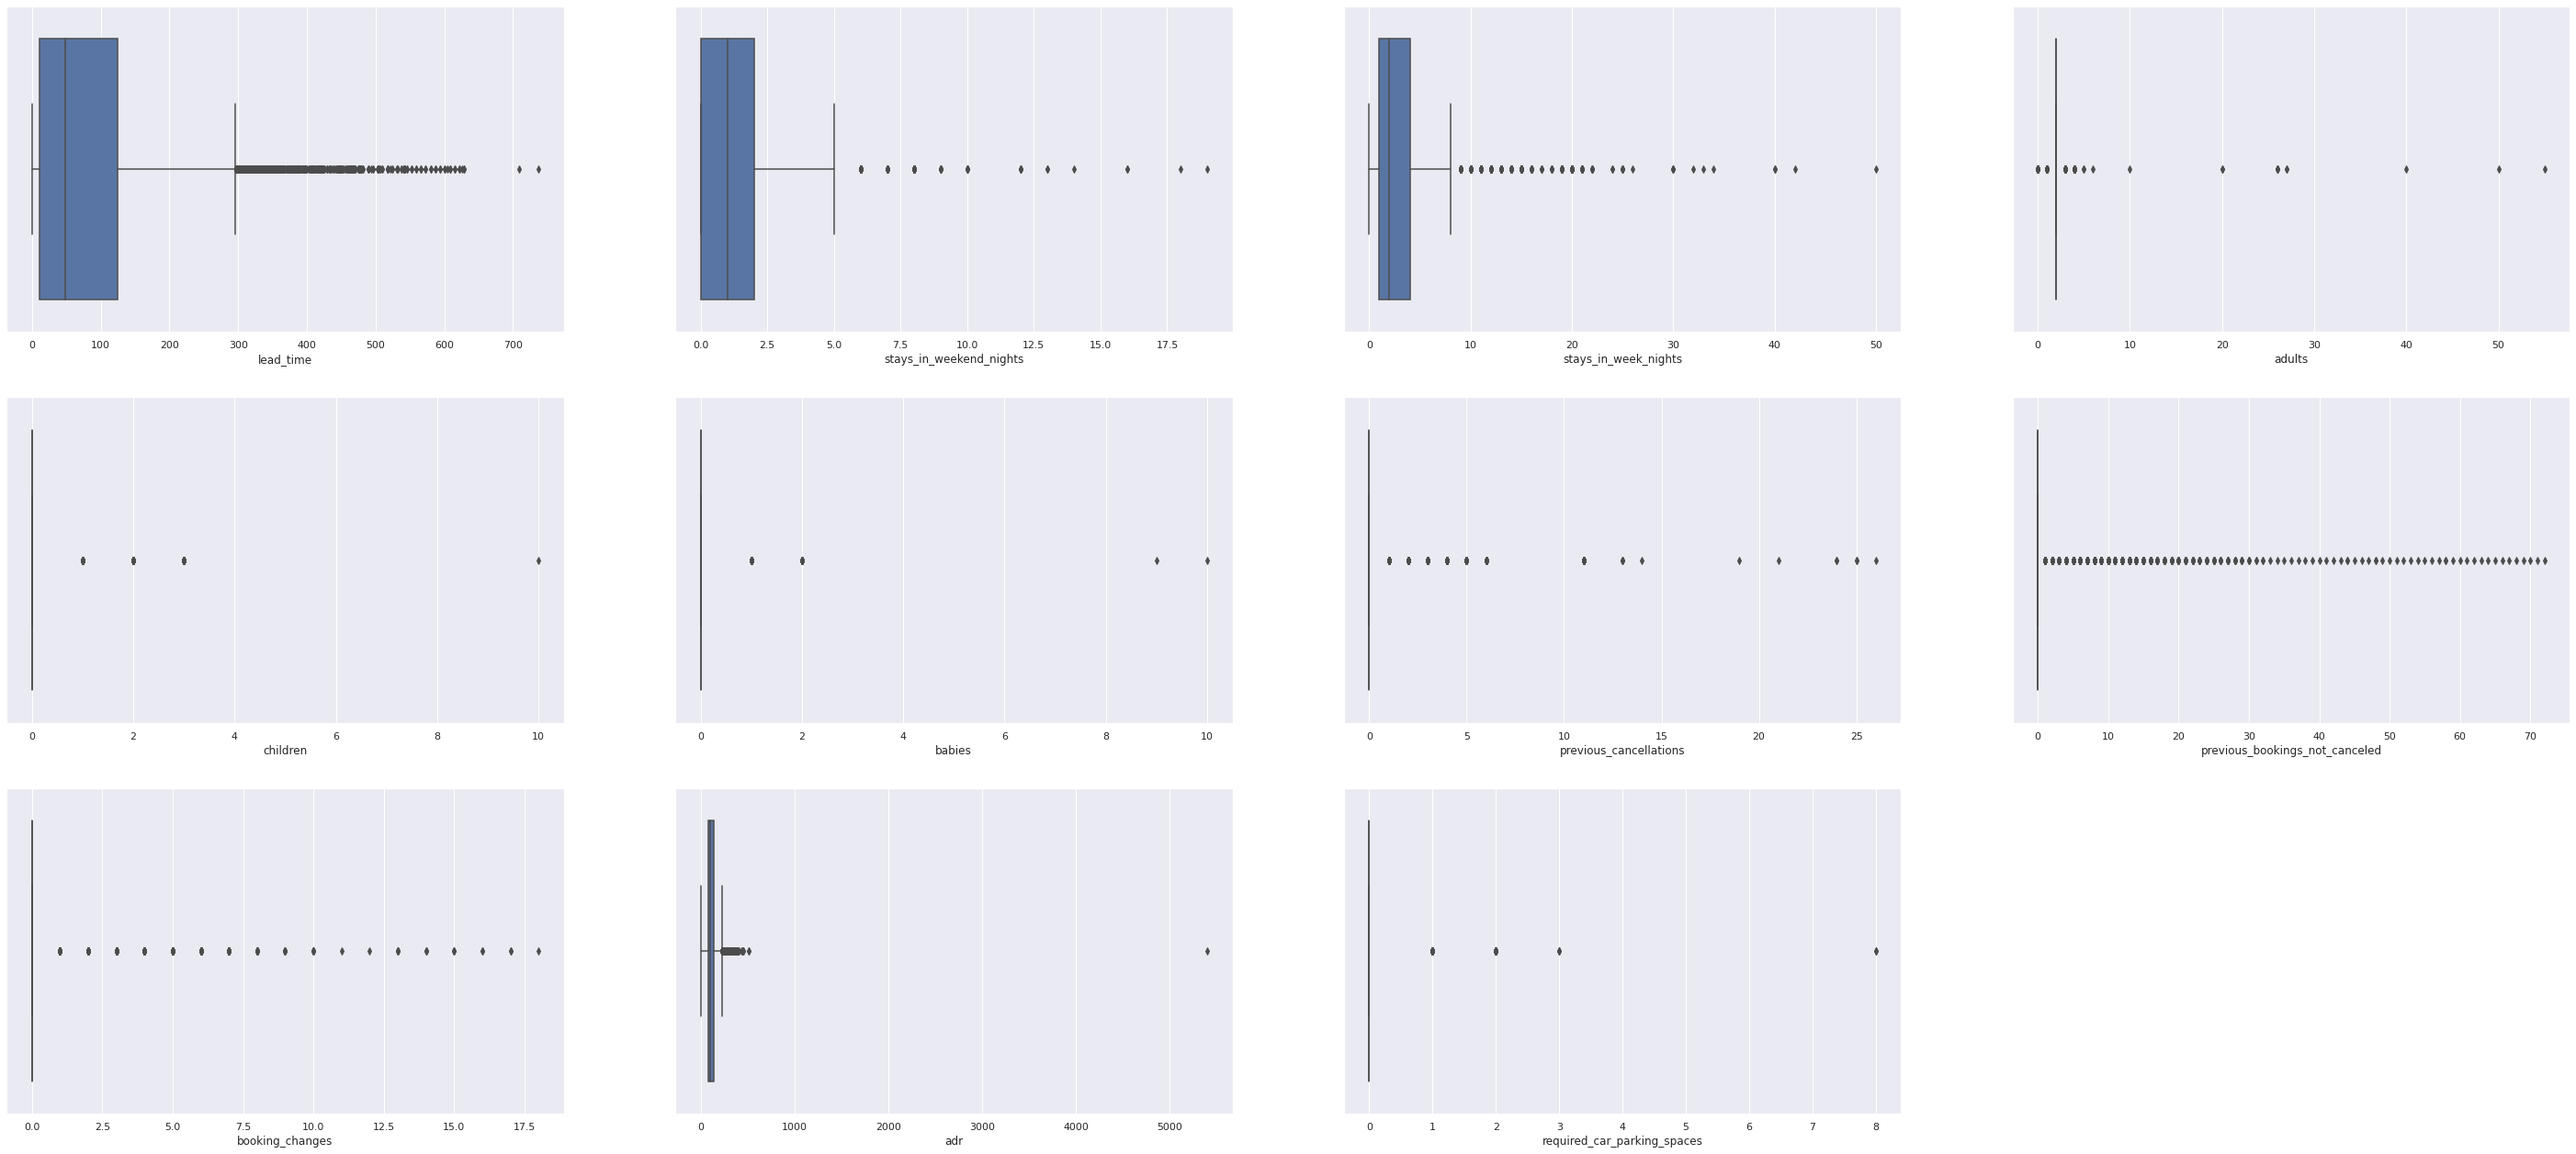

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

columns = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'adr','required_car_parking_spaces']
n = 1
plt.figure(figsize=(50,30))

for column in columns:
  plt.subplot(4,4,n)
  n = n+1
  sns.boxplot(df[column])  

Yes outliers are there so lets remove those outliers

In [ ]:
df.loc[df.lead_time > 500, 'lead_time'] = 500
df.loc[df.stays_in_weekend_nights >=  5, 'stays_in_weekend_nights'] = 5
df.loc[df.adults > 4, 'adults'] = 4
df.loc[df.previous_bookings_not_canceled > 0, 'previous_bookings_not_canceled'] = 1
df.loc[df.previous_cancellations > 0, 'previous_cancellations'] = 1
df.loc[df.stays_in_week_nights > 10, 'stays_in_week_nights'] = 10
df.loc[df.booking_changes > 5, 'booking_changes'] = 5
df.loc[df.babies > 8, 'babies'] = 0
df.loc[df.required_car_parking_spaces > 5, 'required_car_parking_spaces'] = 0
df.loc[df.children > 8, 'children'] = 0
df.loc[df.adr > 1000, 'adr'] = 1000

In [ ]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,87223.000000,87223.000000,87223.000000,87223.000000,87223.000000,87223.000000,87223.000000,87223.000000,87223.000000,87223.000000,87223.000000,87223.000000,87223.000000,87223.000000,87223.000000,87223.000000,87223.000000,87223.000000,87223.000000
mean,0.275260,79.930030,2016.210369,26.834516,15.815989,0.998980,2.600782,1.875618,0.138794,0.010628,0.038568,0.019272,0.040563,0.264070,81.092808,0.746351,106.469427,0.084129,0.698956
std,0.446648,85.805253,0.686055,13.668994,8.835643,0.993149,1.889448,0.505225,0.455058,0.104207,0.192564,0.137482,0.197276,0.661378,109.978439,10.001400,51.969614,0.279107,0.832055
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,11.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,72.250000,0.000000,0.000000
50%,0.000000,49.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,98.200000,0.000000,0.000000
75%,1.000000,125.000000,2017.000000,37.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,240.000000,0.000000,134.100000,0.000000,1.000000
max,1.000000,500.000000,2017.000000,53.000000,31.000000,5.000000,10.000000,4.000000,3.000000,2.000000,1.000000,1.000000,1.000000,5.000000,535.000000,391.000000,1000.000000,3.000000,5.000000


# **Correlation**

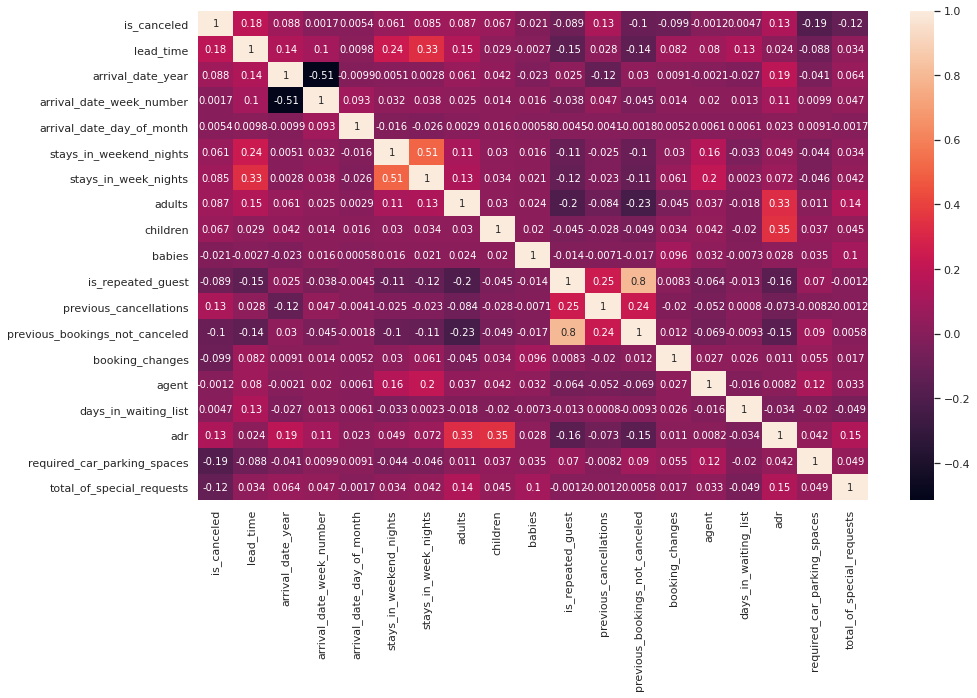

In [ ]:
fig, ax = plt.subplots(figsize=(15,9))
sns.heatmap(df.corr(), annot=True, ax=ax);



Upon observing the Heat map, we Observe the following things,

1.Lead_time is the only variable that has some significant positive correlation with is_canceled feature.

2.Most of the varibles have insignificant level of correlation with is_canceled feature.

3.total_of-special_requests and required_car_parkings have some significant negative correlation with is_canceled feature.

 *     Finally from the above heat map we can conclude that as the lead-time increases ,chances of cancelations also increases i.e they are directly proportional to each other.*





# **Exploratory Data Analysis**

# **EDA on Customer’s Preference's 

 Here I’m trying to analyze the data to understand what are customer’s preferences when they make a booking.
Few questions I’ve tried to answer from these section are :

# **1.Most prefered Type of Hotel ?

Text(0.5, 0, 'type of hotel')

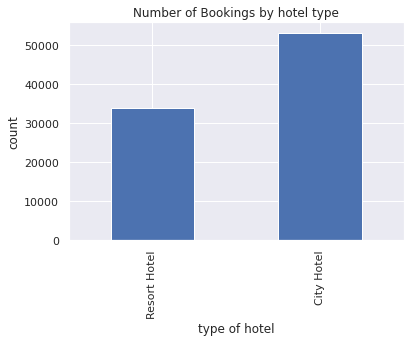

In [ ]:
ax = df['hotel'].value_counts().sort_values().plot(kind = 'bar')
ax.set_title('Number of Bookings by hotel type')
ax.set_ylabel('count')
ax.set_xlabel('type of hotel')

Let's check percentage of each Hotel.

([<matplotlib.patches.Wedge at 0x7f827f865990>,
 [Text(-1.0340805605610217, -0.37506985252057196, '53272'),
  Text(1.1280878842483872, 0.4091671118406238, '33951')],
 [Text(-0.5640439421241935, -0.20458355592031194, '61.1%'),
  Text(0.6580512658115591, 0.23868081524036386, '38.9%')])

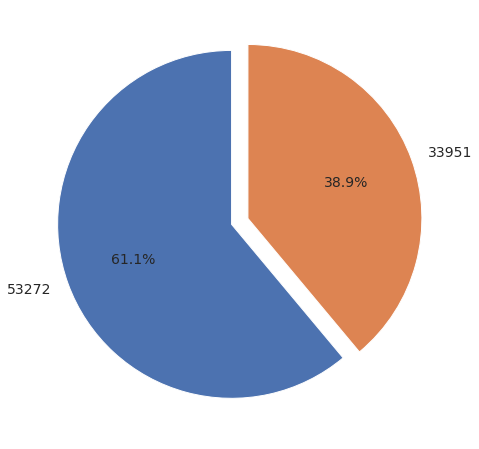

In [ ]:
plt.rcParams['figure.figsize'] = 8,8
labels = df['hotel'].value_counts()
sizes = df['hotel'].value_counts().tolist()
explode = (0,0.1)
plt.pie(sizes, explode=explode, labels=labels,autopct='%1.1f%%',startangle=90, textprops={'fontsize': 14})

By observing  boyh the Graphs it can be concluded that city hotel occupies almost 60% of Bookings in a year.

# **2.Room Category which are prefered by most people ?**

Text(0, 0.5, ' count')

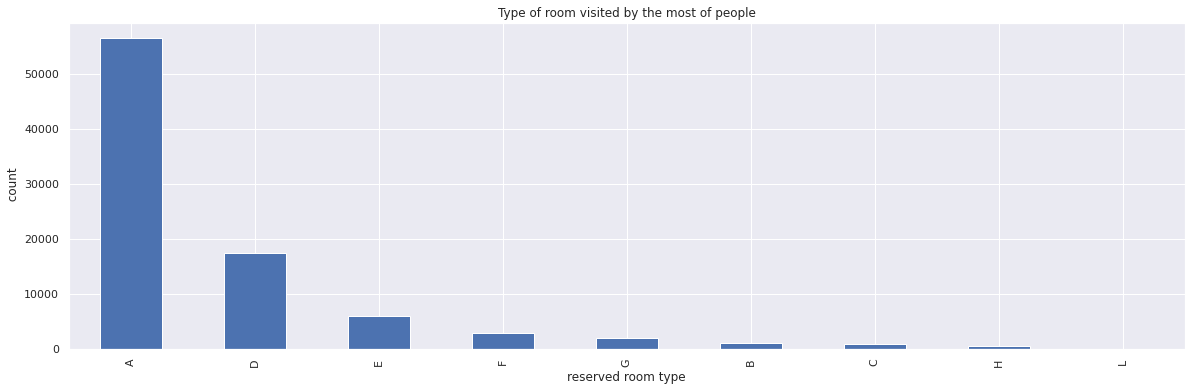

In [ ]:
fig, ax =plt.subplots(figsize=(20,6))
ax= df['reserved_room_type'].value_counts().sort_values(ascending = False).plot(kind = 'bar')
ax.set_title('Type of room visited by the most of people')
ax.set_xlabel('reserved room type')
ax.set_ylabel(' count')

 From the above Graph it has been observed the most of the people have been prefered to Choose A_Type rooms followed by D_Type Rooms.

# **3. Type of meal preferred ?**



Text(0, 0.5, ' count')

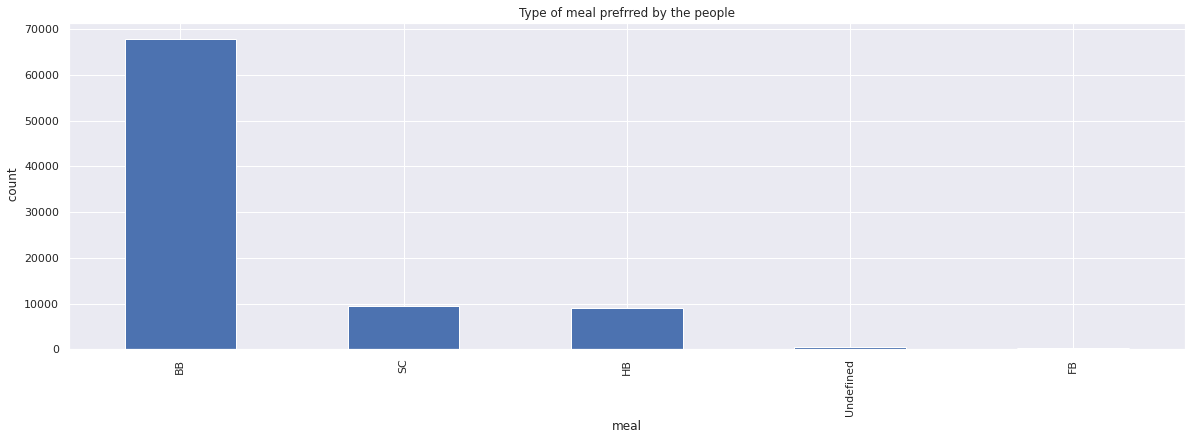

In [ ]:
fig, ax =plt.subplots(figsize=(20,6))
ax= df['meal'].value_counts().sort_values(ascending = False).plot(kind = 'bar')
ax.set_title('Type of meal prefrred by the people')
ax.set_xlabel('meal')
ax.set_ylabel(' count')

 From the Above Graph it has been observed that most of the people preferred Bread and Breakfast.

# 4.Type of people visiting the most ?

In [ ]:
df['total_members'] = df['adults'] + df['children'] + df['babies']

Text(0, 0.5, ' count')

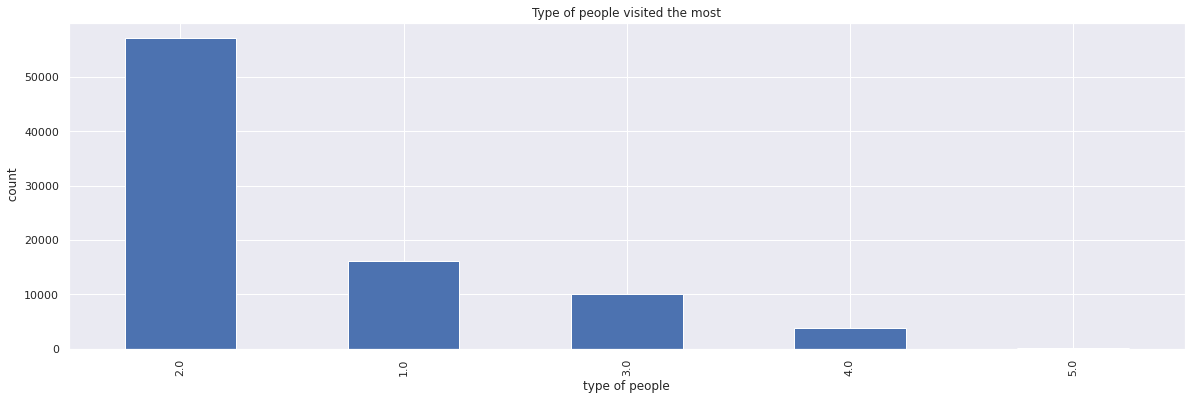

In [ ]:
fig, ax =plt.subplots(figsize=(20,6))
ax= df['total_members'].value_counts().sort_values(ascending = False).plot(kind = 'bar')
ax.set_title('Type of people visited the most')
ax.set_xlabel('type of people')
ax.set_ylabel(' count')


From the above graph it has been observed that most visited people were couples



# **5.What is the Best time of a year to Book a Hotel Room?**

Text(0, 0.5, 'reservation count')

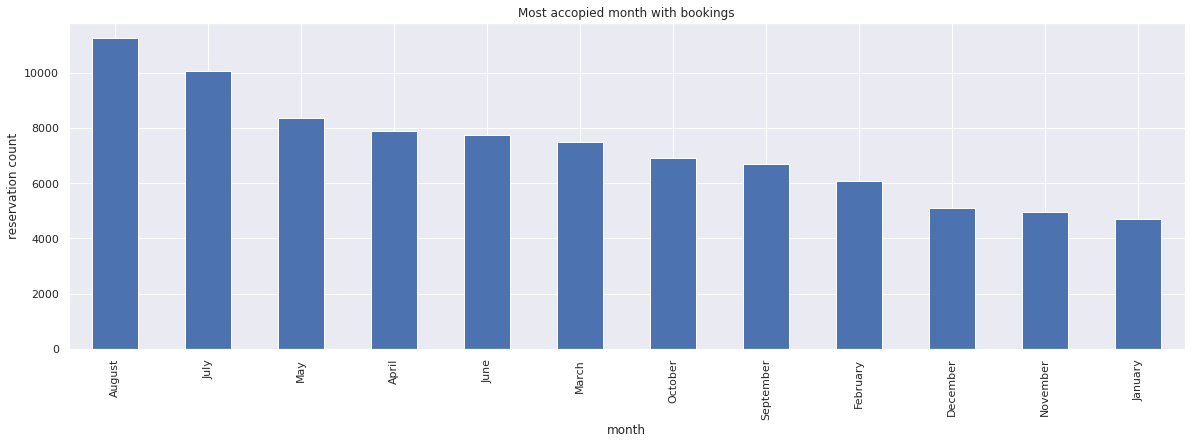

In [ ]:
fig, ax =plt.subplots(figsize=(20,6))
ax = df['arrival_date_month'].value_counts().plot(kind = 'bar')
ax.set_title('Most accopied month with bookings')
ax.set_xlabel('month')
ax.set_ylabel('reservation count')

From the above graph it can be concluded that August and July were the most bussiest months in a Year.

January and November months were the best time to book a hotel.

# **6.Comparision Between stay weekends and stay in week nights ?**

In [ ]:
stay_weekendnight = df['stays_in_weekend_nights'].sum()

In [ ]:
stay_weeknight=df['stays_in_week_nights'].sum()

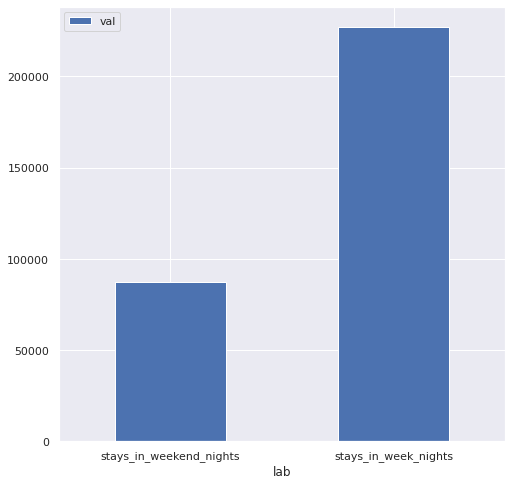

In [ ]:
df1 = pd.DataFrame({'lab':['stays_in_weekend_nights','stays_in_week_nights'], 'val':[stay_weekendnight,stay_weeknight]})
ax = df1.plot.bar(x='lab', y='val', rot=0)

so it can be observed that most of the people were preferd to stay at Week end nights than Week day nights.

In [ ]:
numerical_columns=list(df.select_dtypes(['int64','float64']).columns)
numerical_features=pd.Index(numerical_columns)
numerical_features

Index(['is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'agent',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests'],
      dtype='object')

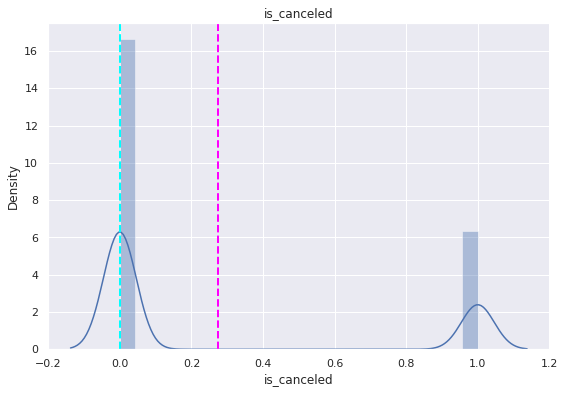

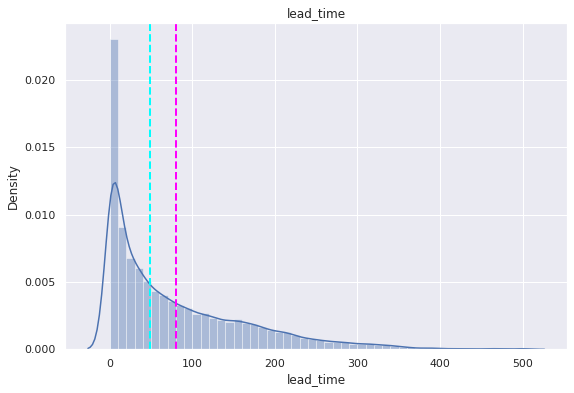

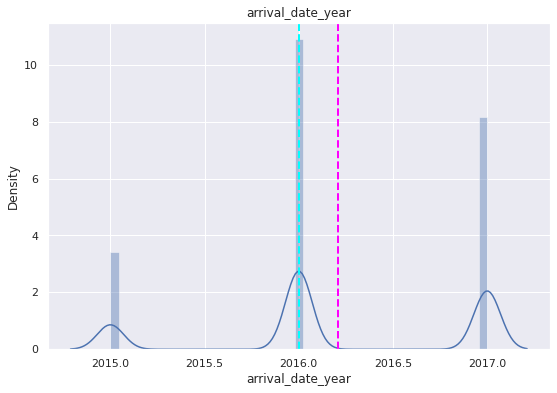

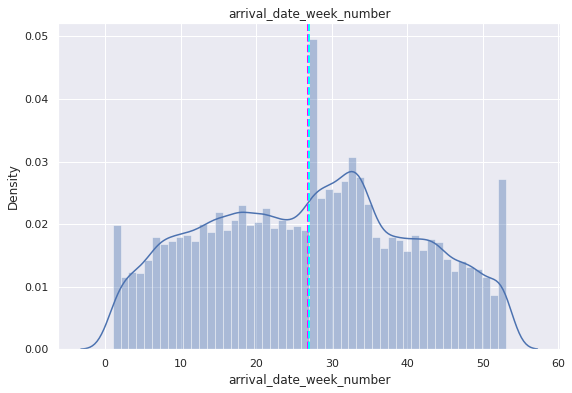

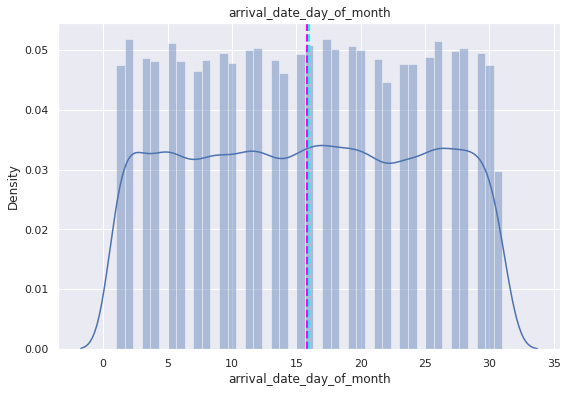

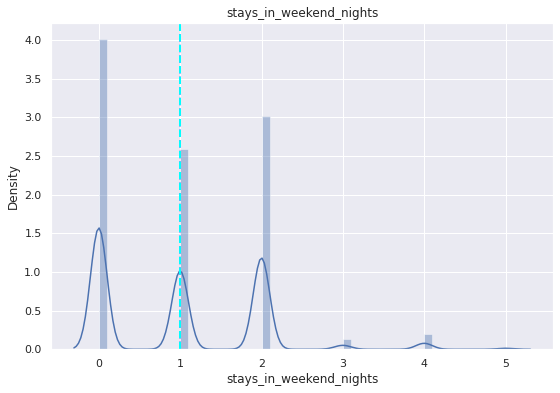

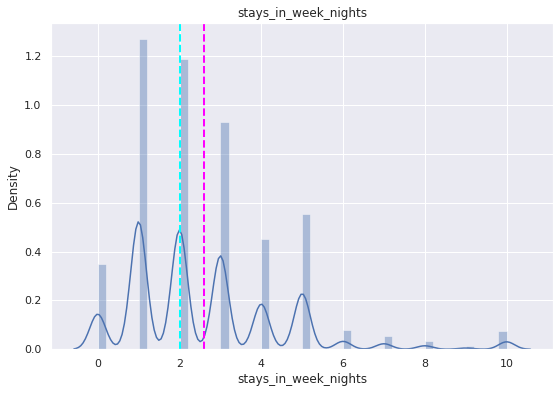

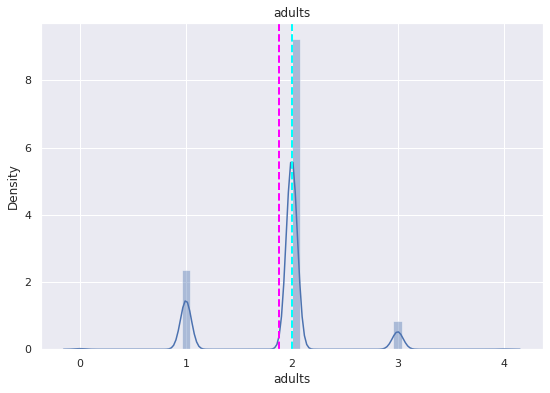

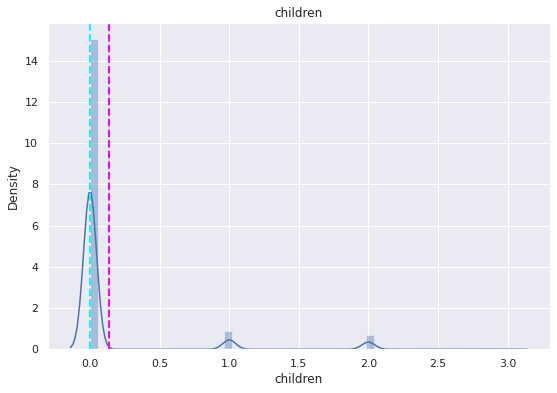

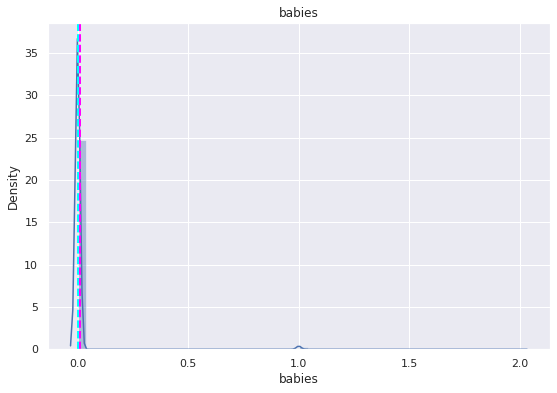

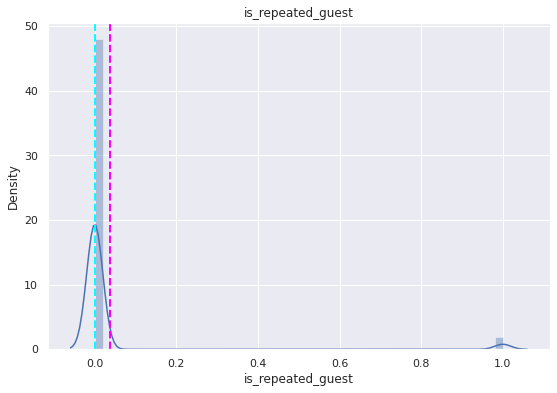

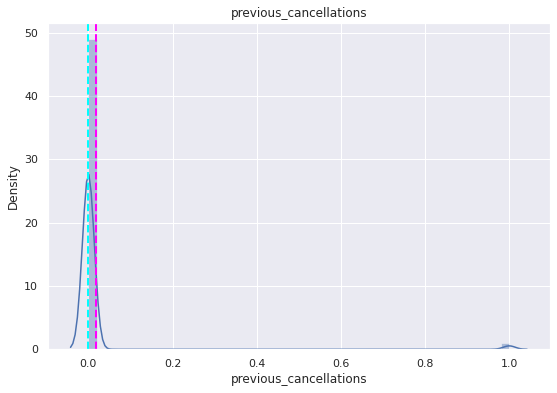

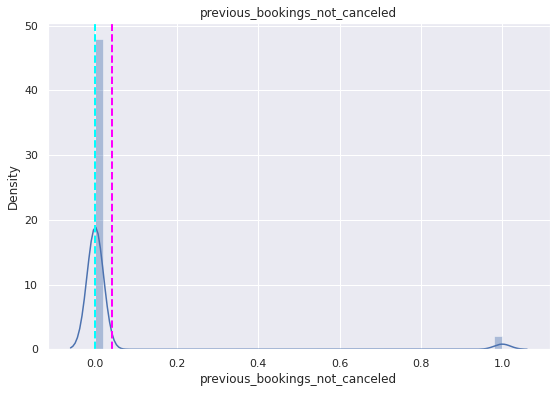

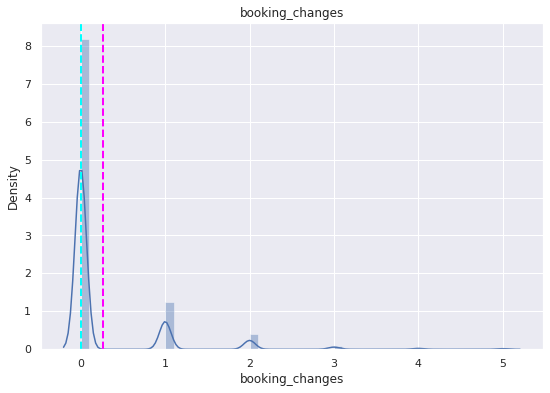

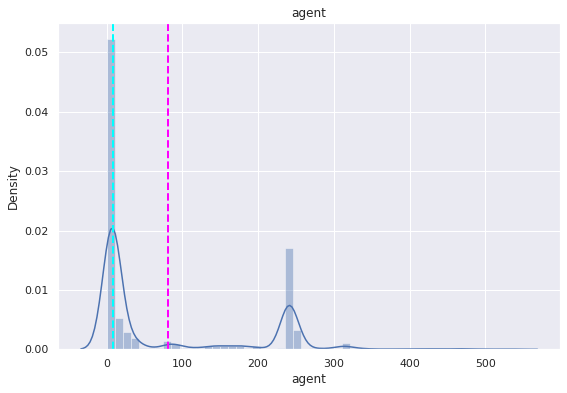

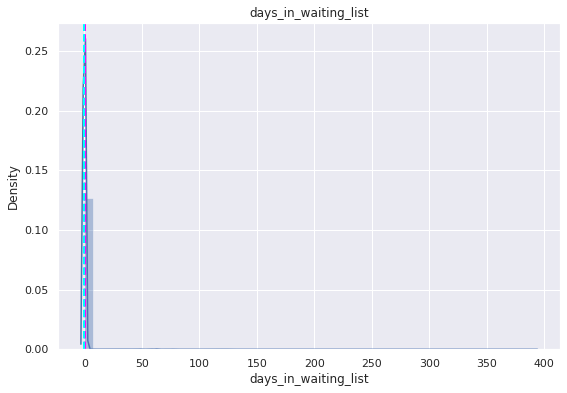

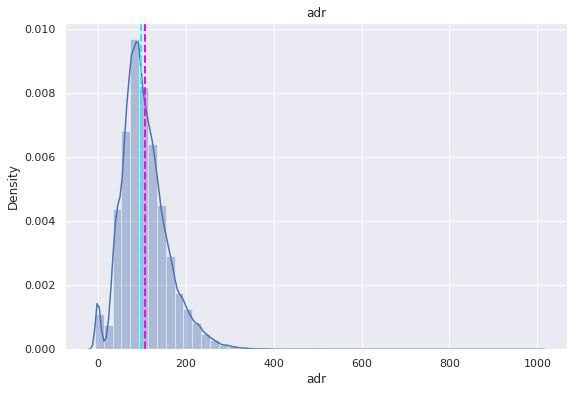

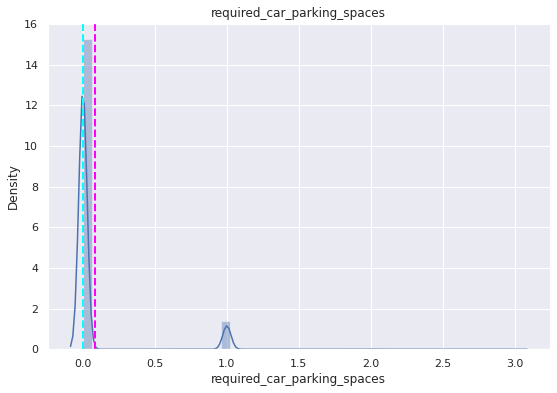

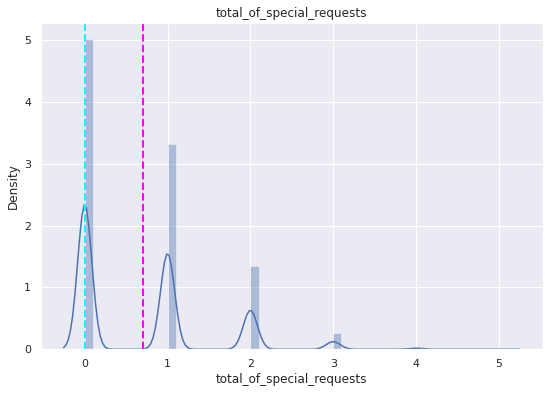

In [ ]:
#plot a bar plot for each numerical feature count with Dist Plot
for col in numerical_features:
  fig=plt.figure(figsize=(9,6))
  ax=fig.gca()
  feature= (df[col])
  sns.distplot(df[col])
  ax.axvline(feature.mean(),color='magenta', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(),color='cyan', linestyle='dashed', linewidth=2)
  ax.set_title(col)
plt.show()

## **conclusions**


**After Performing the EDA, Below are some of the conclusions i came up with** :

1.Peak Seasons are August and July whereas Off Seasons are January and December.Hence January and December were the best months to book a Hotel.


2.As the Resort Hotels are costly most of the people prefered to Book City Hotels .

3.Most of the people were pefered to stay at Weekend nights than Weekday nights.

4.The most visited type people were Couple followed by single person.

5.most of the people preferred Bread and Breakfast than Full meals.